# Bikesharing

> Getting started on the bikesharing kaggle dataset found here: https://www.kaggle.com/c/bike-sharing-demand

### Data Fields
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import missingno as msno
%matplotlib inline

In [4]:
df = pd.read_csv('./data/train.csv', parse_dates=['datetime'])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Distribution analysis

In [15]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

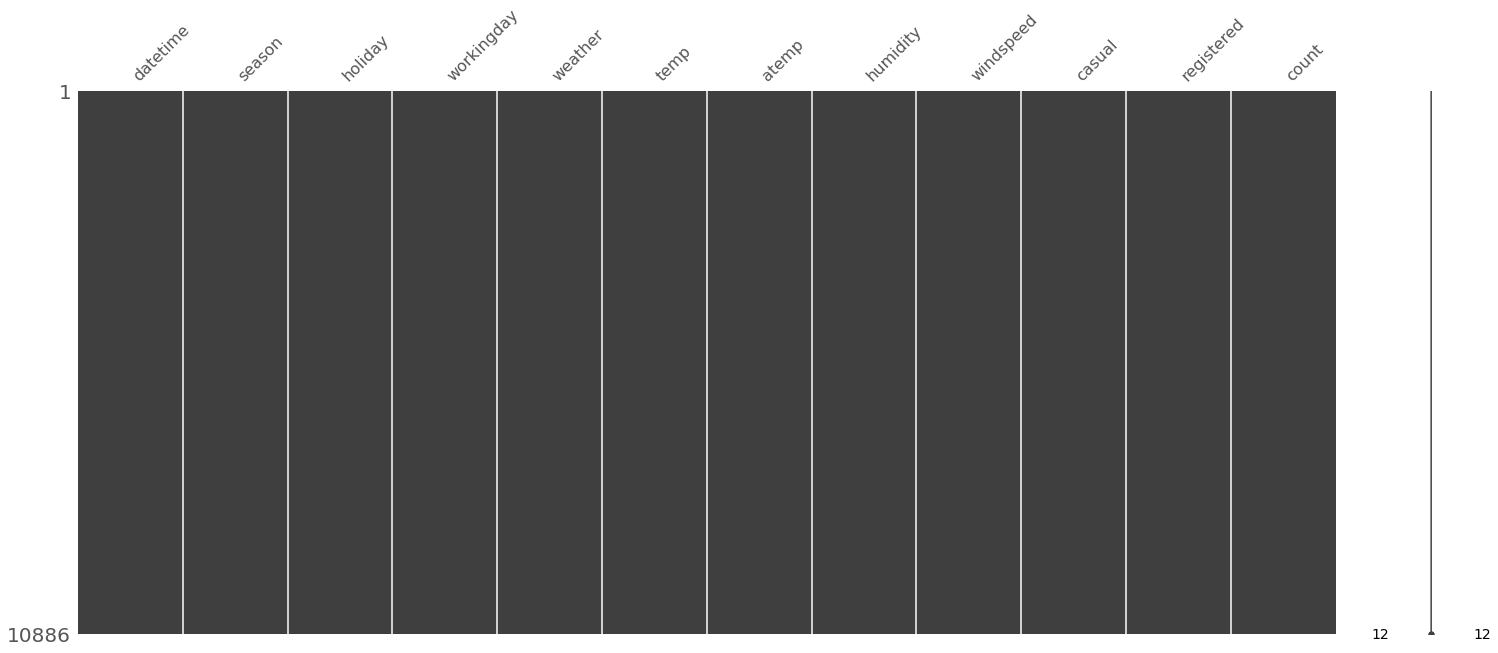

In [18]:
msno.matrix(df)

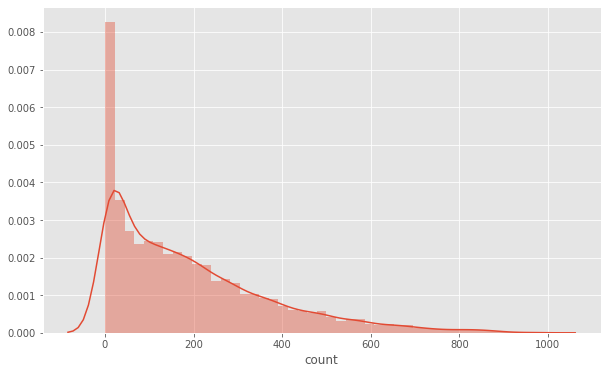

In [26]:
plt.figure(figsize=(10,6))
sns.distplot(df['count'])

### Plotting seasonality

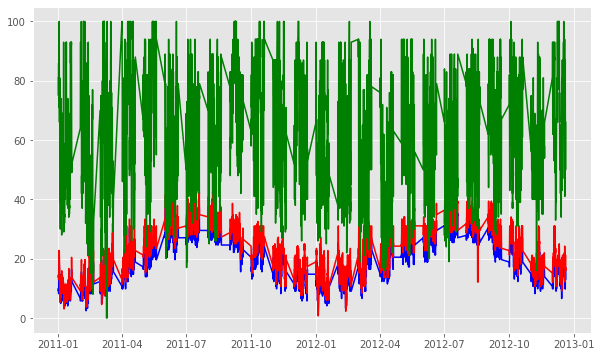

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot('datetime', 'temp', data=df, color='blue')
plt.plot('datetime', 'atemp', data=df, color='red')
plt.plot('datetime', 'humidity', data=df, color='green')

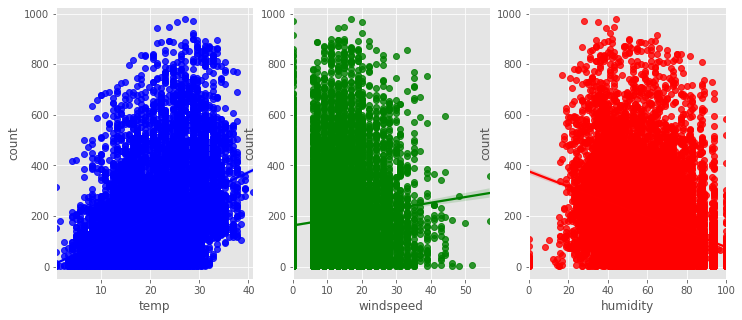

In [21]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=df,ax=ax1, color='blue')
sns.regplot(x="windspeed", y="count", data=df,ax=ax2, color='green')
sns.regplot(x="humidity", y="count", data=df,ax=ax3, color='red')

### Feature engineering

In [31]:
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['dayofweek'] = df['datetime'].dt.dayofweek
df['year'] = df['datetime'].dt.year
df['day'] = df['datetime'].dt.day

In [32]:
df.drop('datetime', axis=1, inplace=True)

### Predicting missing windspeeds

In [33]:
df_no_wind = df[df['windspeed']==0]
df_wind = df[df['windspeed']!=0]
wind_cols = ['season','holiday','workingday','weather','temp','atemp','humidity','hour','month','dayofweek','day','year']


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(df_wind[wind_cols],df_wind['windspeed'])
df_no_wind.loc[:,'windspeed'] = rf.predict(df_no_wind[wind_cols])

/Users/ar/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
data = df_wind.append(df_no_wind)
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,dayofweek,year,day
0,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,1,5,2011,1
1,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,10,1,5,2011,1
2,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,11,1,5,2011,1
3,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,12,1,5,2011,1
4,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,13,1,5,2011,1
